In [11]:
%matplotlib inline
import torch
import torchvision
from torch.utils import  data
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

In [12]:
trans = transforms.ToTensor()
mist_train=torchvision.datasets.FashionMNIST(
    root="../data",train=True,transform=trans,download=True
)
mist_test=torchvision.datasets.FashionMNIST(
    root="../root",train=False,transform=trans,download=True
)


In [13]:
len(mist_train),len(mist_test)

(60000, 10000)

In [14]:
def get_label_byindex(labels):
    test_labels=['t-shirt','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']
    return [test_labels[int(i)] for i in labels]

In [15]:
def show_img(imgs,num_rows,num_cols,titles=None,scale=1.5):
    figsize=(num_cols*scale,num_rows*scale)
    _,axes=d2l.plt.subplots(num_rows,num_cols,figsize=figsize)
    axes =axes.flatten()
    for i,(ax,img) in enumerate(zip(axes,imgs)):
        if torch.is_tensor(img):
            ax.imshow(img.numpy())
        else:
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:  
            ax.set_title(titles[i])
    return axes

array([<AxesSubplot:title={'center':'ankle boot'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'dress'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'pullover'}>,
       <AxesSubplot:title={'center':'sneaker'}>,
       <AxesSubplot:title={'center':'pullover'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'ankle boot'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'sneaker'}>,
       <AxesSubplot:title={'center':'ankle boot'}>,
       <AxesSubplot:title={'center':'trouser'}>,
       <AxesSubplot:title={'center':'t-shirt'}>], dtype=object)

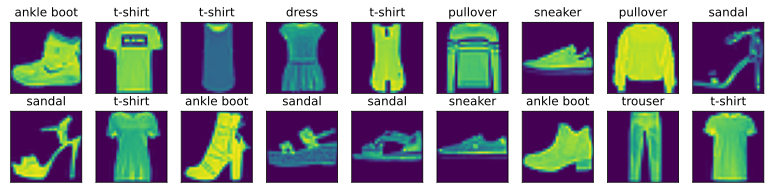

In [16]:
X,y=next(iter(data.DataLoader(mist_train,batch_size=18)))
show_img(X.reshape(18,28,28),2,9,titles=get_label_byindex(y))

In [17]:
batch_size=256
def get_dataloader_workers():
    return 4

#train_iter=data.DataLoader(mist_train,batch_size=batch_size,shuffle=True,num_workers=get_dataloader_workers())

In [18]:
# timer =d2l.Timer()
# from tqdm import tqdm
# for X,y in tqdm(train_iter):
#     continue
# print(f'{timer.stop():.5f} s')

In [31]:
def load_data_fashion_mist(batch_size,resize=None):
    trans=[transforms.ToTensor()]
    if resize:
        trans.insert(0,transforms.Resize(resize))
    trans=transforms.Compose(trans)
    mist_train=torchvision.datasets.FashionMNIST(
        root="../data",train=True,transform=trans
    )
    mist_test=torchvision.datasets.FashionMNIST(
        root="../data",train=False,transform=trans
    )
    return (data.DataLoader(mist_train,batch_size,shuffle=True)
    ,data.DataLoader(mist_test,batch_size,shuffle=False)
    )

torch.Size([32, 1, 64, 64])


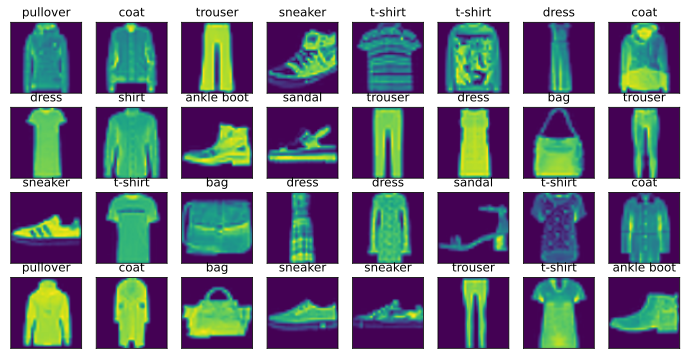

In [33]:
train_iter=load_data_fashion_mist(32,resize=64)
for X,y in train_iter:
    print(X.shape)
    show_img(X.reshape(32,64,64),4,8,titles=get_label_byindex(y))
    break

In [ ]:
得到了什么
bug 在DataLoader的批量遍历中
实现原理是增加一个维度 例如有10*4*4的10张16像素的图片集
如果batch为5,那么dataloader的数据的形状就会变为 [2,5,4,4]
每一个小批量数据的shape为[2,1,4,4]


同时 dataloader接受的参数是已经预处理好的数据集
即label已经被编码过,torchvision里的数据集都是已经被编码完成的数据集
而在自己构建数据集时,需要自己处理label